In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/meteorite-cleaned.csv')
df.sample(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
29853,Yamato 792789,28138,Valid,LL4,8.81,Found,1979.0,-71.50000,35.66667,"(-71.500000, 35.666670)"
4010,Asuka 881061,3770,Valid,H4,1244.18,Found,1988.0,-72.00000,26.00000,"(-72.000000, 26.000000)"
19161,Meteorite Hills 00875,16109,Valid,H5,12.30,Found,2000.0,-79.68333,159.75000,"(-79.683330, 159.750000)"
15570,Jiddat al Harasis 575,51917,Valid,H6,190.40,Found,2009.0,19.75988,56.28608,"(19.759880, 56.286080)"
6591,Daraj 139,6594,Valid,H5,244.00,Found,1986.0,29.58333,11.78333,"(29.583330, 11.783330)"


Meteors over the years

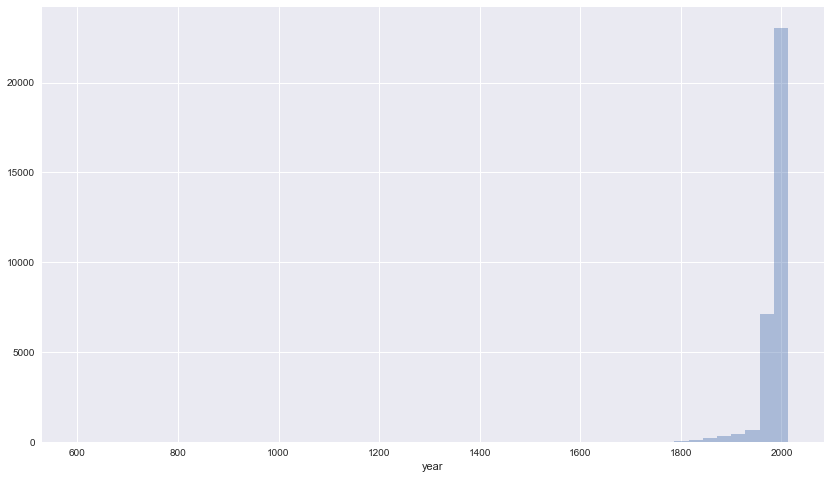

In [3]:
plt.figure(figsize=(14,8))
sns.distplot(df['year'], kde=False)

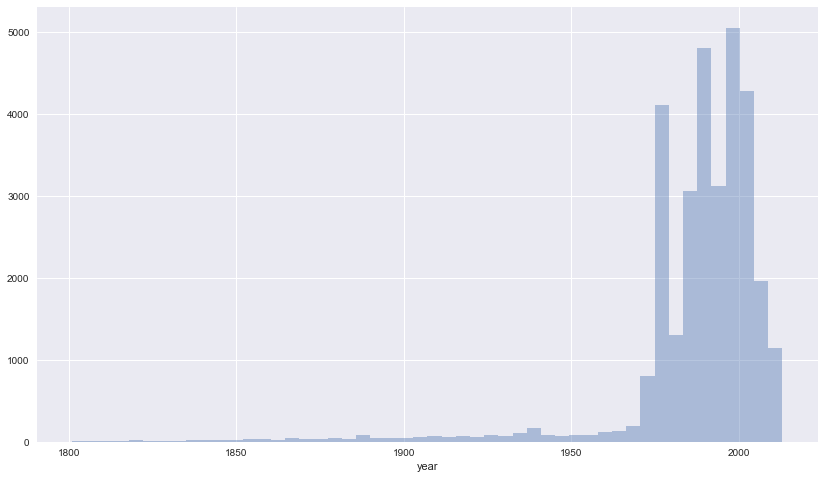

In [4]:
plt.figure(figsize=(14,8))
sns.distplot(df[df['year']>1800]['year'], kde=False)

In [5]:
import plotly


In [6]:
from plotly.graph_objs import Scatter, Layout

In [7]:
plotly.offline.init_notebook_mode(connected=True)

In [8]:
import plotly.graph_objs as go

In [9]:
df2 = df[:100]

In [27]:
meteo = go.Scattergeo(
    #type = 'scattergeo',
    #locationmode
    lon = df2['reclong'],
    lat = df2['reclat'],
    text = df2['name'],
    marker = dict(
        size = df2['mass']/10000000,
        line = dict(width=0.5, color='rgb(40,40,40)'),
        #sizemode = 'area'
    )
)

layout = go.Layout(
    title = "meteorites landings",
    geo = dict(
        projection=dict( type='Mercator' ),
        showland = True,
        landcolor = 'rgb(217, 217, 217)'
    )
    
)

In [28]:
pfig = go.Figure(data = meteo, layout = layout)
plotly.offline.iplot(pfig, validate=False)

PlotlyDictValueError: 'data' has invalid value inside 'figure'

Path To Error: ['data']

Current path: []
Current parent object_names: []

Additionally:

    role: object



In [14]:
trace = [dict(
    type = 'scattergo',
    locationmode = 'USA-states',
    lon = df2['reclong'],
    lat = df2['reclat'],
    text = df2['name'],
    mode = 'markers',
    marker = dict(
        size = 8,
        opacity = 0.7,
        symbol = 'square'
    )
)]

layout = dict(
    title = "meteorite landings",
    geo = dict(
        scope = 'usa',
        projection=dict( type='albers usa' ),
        showland = True
    ),
)

pfig2 = dict(data = trace, layout = layout)
plotly.offline.iplot(pfig2, validate=False)

In [17]:
trace2 = dict(
    type = 'scattergeo',
    lon = [100, 400],
    lat = [0, 0],
    marker = dict(
        color = ['red', 'blue'],
        size = [30, 50]
    ),
    mode = 'markers'
    
)

plotly.offline.iplot([trace2])

In [27]:
trace3 = dict(
    type = 'scattergeo',
    lon = df2['reclong'],
    lat = df2['reclat'],
    marker = dict(
        #color = ['red', 'blue'],
        size = np.log10(df2['mass'])
    ),
    mode = 'markers'
    
)

plotly.offline.iplot([trace3])

In [26]:
x = 60000000
np.log10(x)

7.7781512503836439